In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("election2024.csv")

In [7]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [8]:
df.shape

(1600, 16)

In [9]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [10]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [11]:
# Create a copy of the original dataframe
df_copy = df.copy()

In [12]:

df_copy.sample(2)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
968,071683896b4ceaf4,male,74.0,volga,city with population of 100-500k,named correct date,definitely yes,Putin,over 4 hours a day,several times a week,college,medium,unemployed pensioner,NaN,NaN,0.728657
698,0716790935ccef0c,female,41.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,does not watch,less than 4 hours a day,bachelor degree,medium,work for hire,commercial organization,finances,1.246380


In [13]:
# Drop the columns 'job_type' and 'company_type' from the DataFrame 'df_copy'
df_copy = df_copy.drop(['job_type', 'company_type'], axis=1)

In [14]:
df_copy.isna().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
weight1                0
dtype: int64

In [15]:
# check for the duplicates row
df_copy.duplicated().sum()

0

In [16]:
#in the dataset we don't need the id because our model will not anything from this
df_copy = df_copy.drop(['id'],axis =1 )

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  weight1              1600 non-null   float64
dtypes: float64(2), object(11)
memory usage: 162.6+ KB


In [18]:
# we converted the age into integer
df_copy['age'] = df_copy['age'].astype(int)

In [19]:
df_copy.sample(1)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
784,female,51,siberian,village,named correct date,definitely no,Putin,several times a week,less than 4 hours a day,school,medium,work for hire,1.150001


In [20]:
# based on the we have to do encoding
from  sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
df_copy['sex'] = encoding.fit_transform(df_copy['sex'])
df_copy['federal_district'] = encoding.fit_transform(df_copy['federal_district'])
df_copy['knows_election_date'] = encoding.fit_transform(df_copy['knows_election_date'])
df_copy['will_vote'] = encoding.fit_transform(df_copy['will_vote'])
df_copy['candidate'] = encoding.fit_transform(df_copy['candidate'])
df_copy['television_usage'] = encoding.fit_transform(df_copy['television_usage'])
df_copy['internet_usage'] = encoding.fit_transform(df_copy['internet_usage'])
df_copy['education'] = encoding.fit_transform(df_copy['education'])
df_copy['income'] = encoding.fit_transform(df_copy['income'])
df_copy['employment'] = encoding.fit_transform(df_copy['employment'])
df_copy['type_of_city'] = encoding.fit_transform(df_copy['type_of_city'])

df_copy['weight1'] = df_copy['weight1'].astype(float)

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   int32  
 1   age                  1600 non-null   int32  
 2   federal_district     1600 non-null   int32  
 3   type_of_city         1600 non-null   int32  
 4   knows_election_date  1600 non-null   int32  
 5   will_vote            1600 non-null   int32  
 6   candidate            1600 non-null   int32  
 7   television_usage     1600 non-null   int32  
 8   internet_usage       1600 non-null   int32  
 9   education            1600 non-null   int32  
 10  income               1600 non-null   int32  
 11  employment           1600 non-null   int32  
 12  weight1              1600 non-null   float64
dtypes: float64(1), int32(12)
memory usage: 87.6 KB


In [22]:
df_copy

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,1,18,2,6,0,4,2,5,3,3,4,2,1.445172
1,1,23,2,6,0,4,2,2,3,2,4,10,1.445172
2,1,20,7,4,0,1,2,5,3,2,4,10,1.301691
3,1,22,3,0,2,4,0,5,3,2,4,7,1.538628
4,1,21,5,0,0,1,2,0,3,1,4,1,1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,61,0,5,0,0,6,3,1,1,0,8,1.270761
1596,0,80,7,6,0,3,5,5,0,2,0,8,0.921724
1597,0,76,3,2,0,1,2,0,3,1,0,8,1.396691
1598,0,74,0,4,2,1,2,3,3,0,0,0,0.995849


In [23]:
# now we have to do EDA and graphical representation

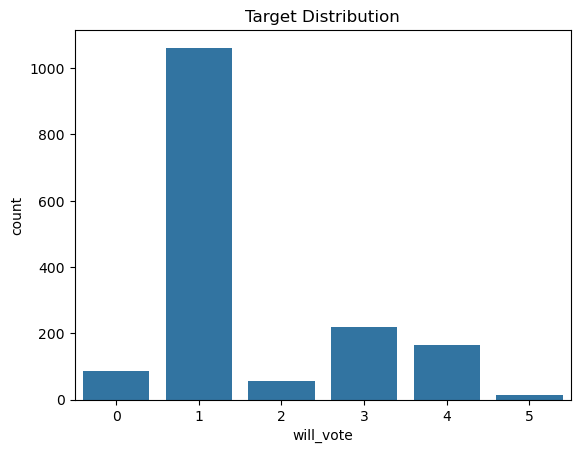

In [24]:
#Let's check the distributaion of Target variable.
sns.countplot(x='will_vote', data=df_copy,)
plt.title('Target Distribution');
# 1 is definately yess

In [50]:
df_copy['will_vote'].value_counts()

will_vote
1    1062
3     218
4     166
0      86
2      55
5      13
Name: count, dtype: int64

In [58]:
def plot(col, df_copy=df_copy):
    return df_copy.groupby(col)['will_vote'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12,8))

<Axes: xlabel='sex'>

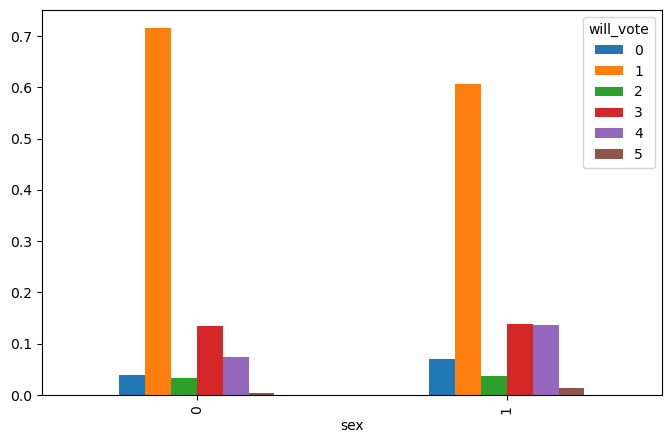

In [54]:
plot('sex')

<Axes: xlabel='age'>

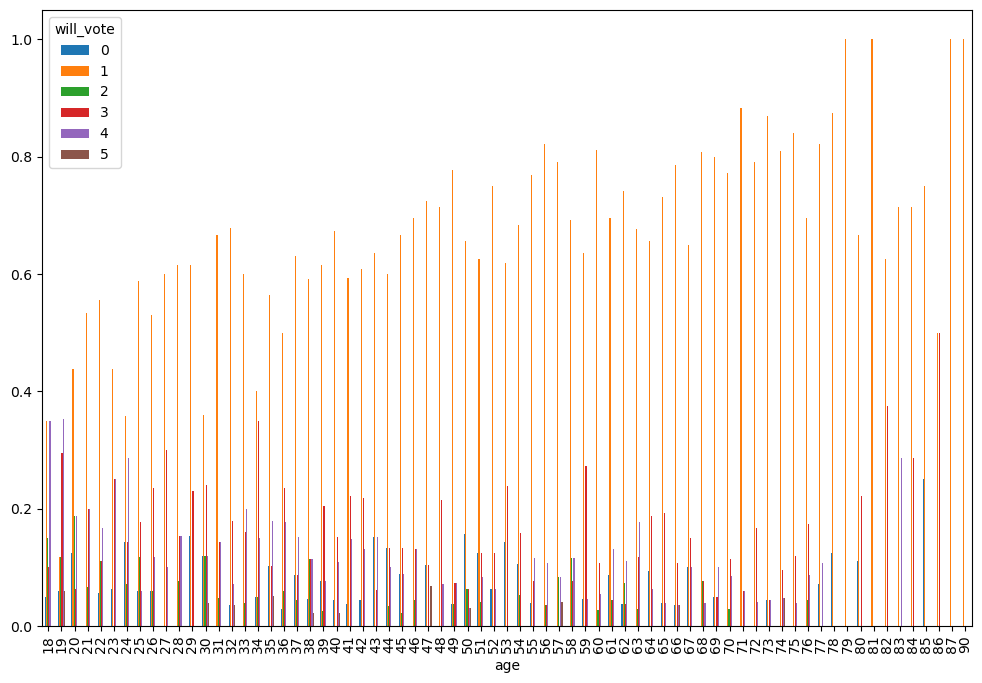

In [60]:
plot('age')

<Axes: xlabel='type_of_city'>

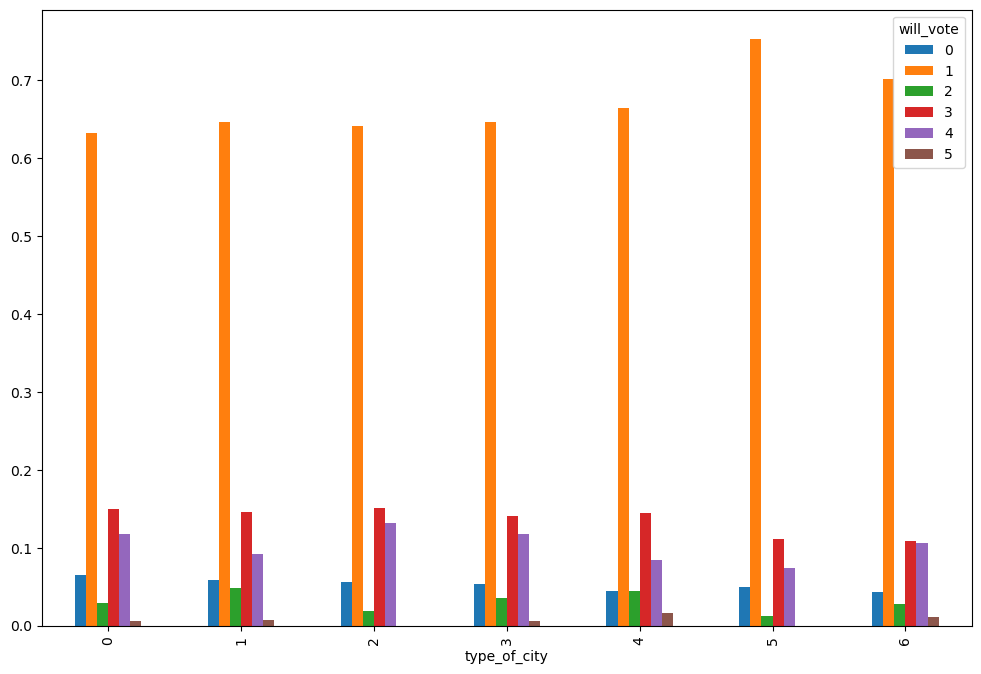

In [62]:
plot('type_of_city')

In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   int32  
 1   age                  1600 non-null   int32  
 2   federal_district     1600 non-null   int32  
 3   type_of_city         1600 non-null   int32  
 4   knows_election_date  1600 non-null   int32  
 5   will_vote            1600 non-null   int32  
 6   candidate            1600 non-null   int32  
 7   television_usage     1600 non-null   int32  
 8   internet_usage       1600 non-null   int32  
 9   education            1600 non-null   int32  
 10  income               1600 non-null   int32  
 11  employment           1600 non-null   int32  
 12  weight1              1600 non-null   float64
dtypes: float64(1), int32(12)
memory usage: 87.6 KB


<Axes: xlabel='education'>

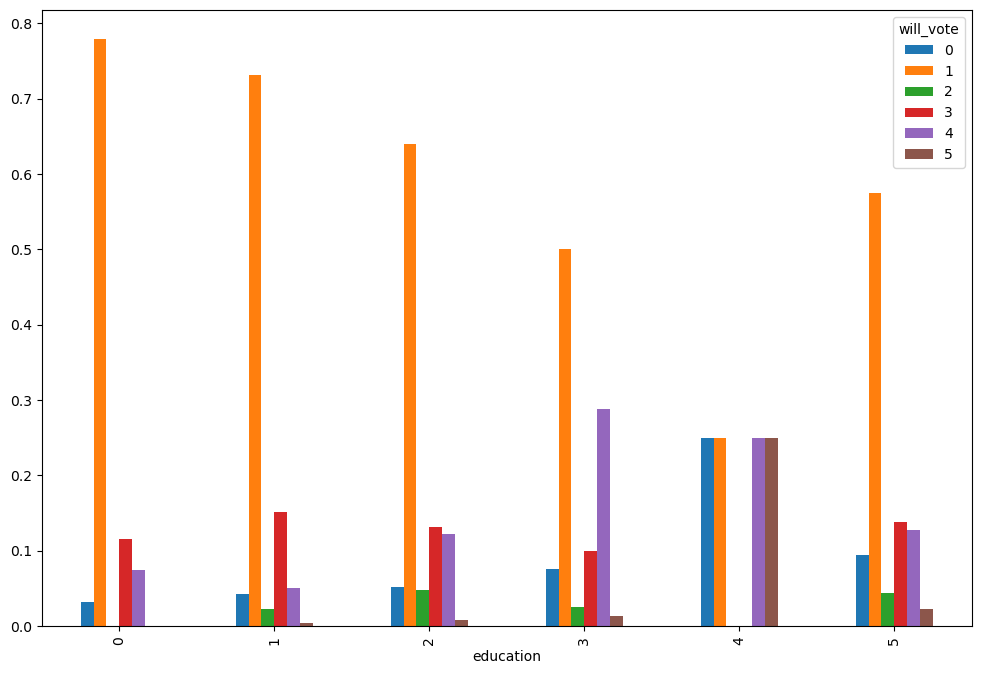

In [66]:
plot('education')

<Axes: xlabel='employment'>

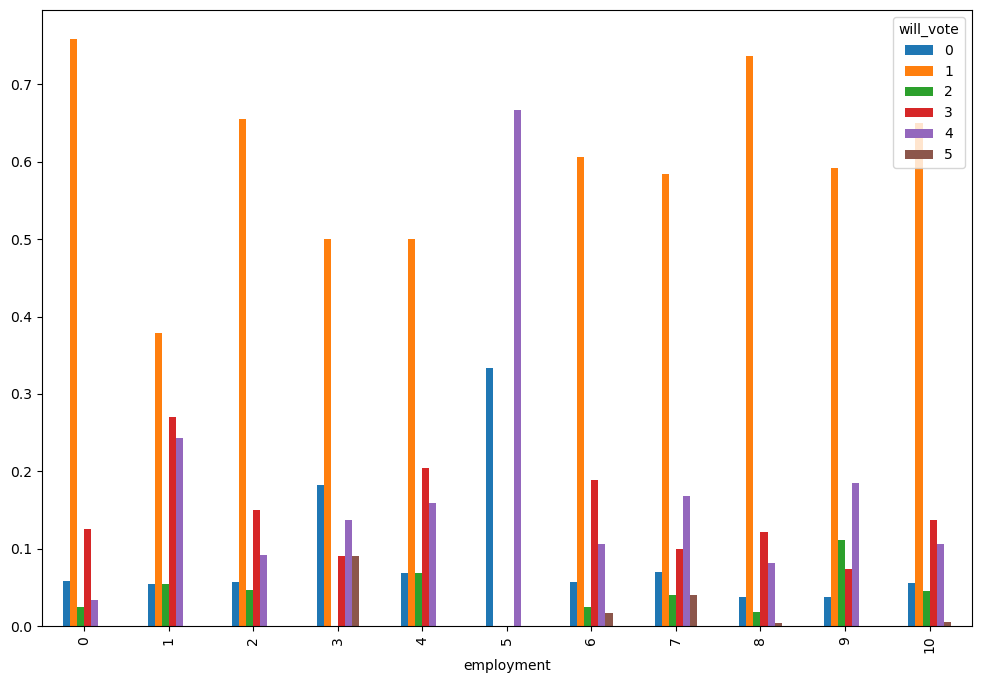

In [68]:
plot('employment')

<Axes: xlabel='federal_district'>

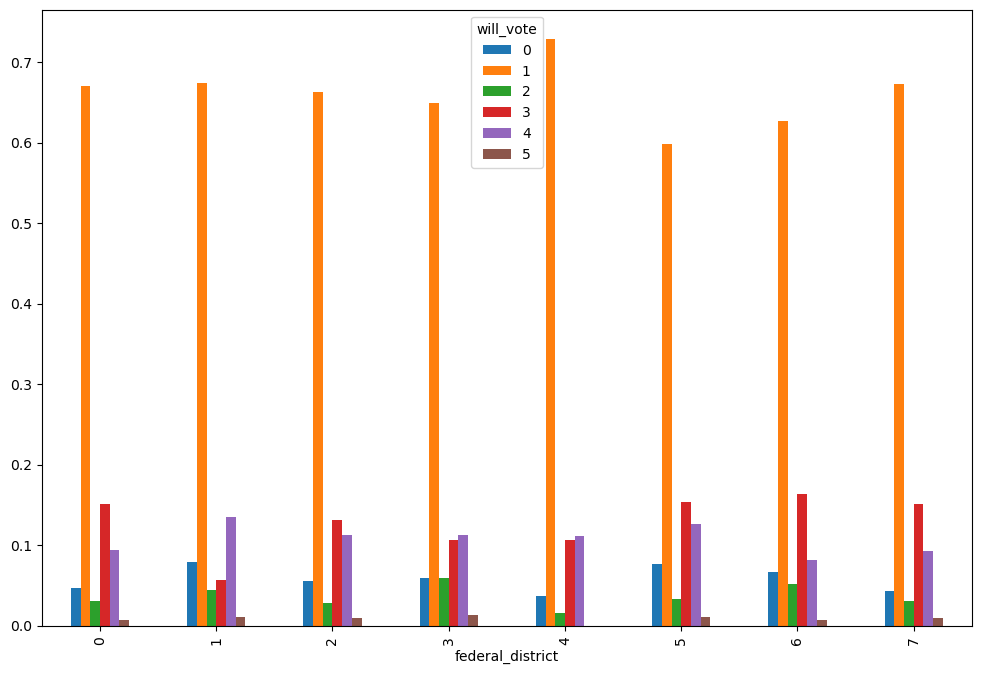

In [70]:
plot('federal_district')

<Axes: xlabel='knows_election_date'>

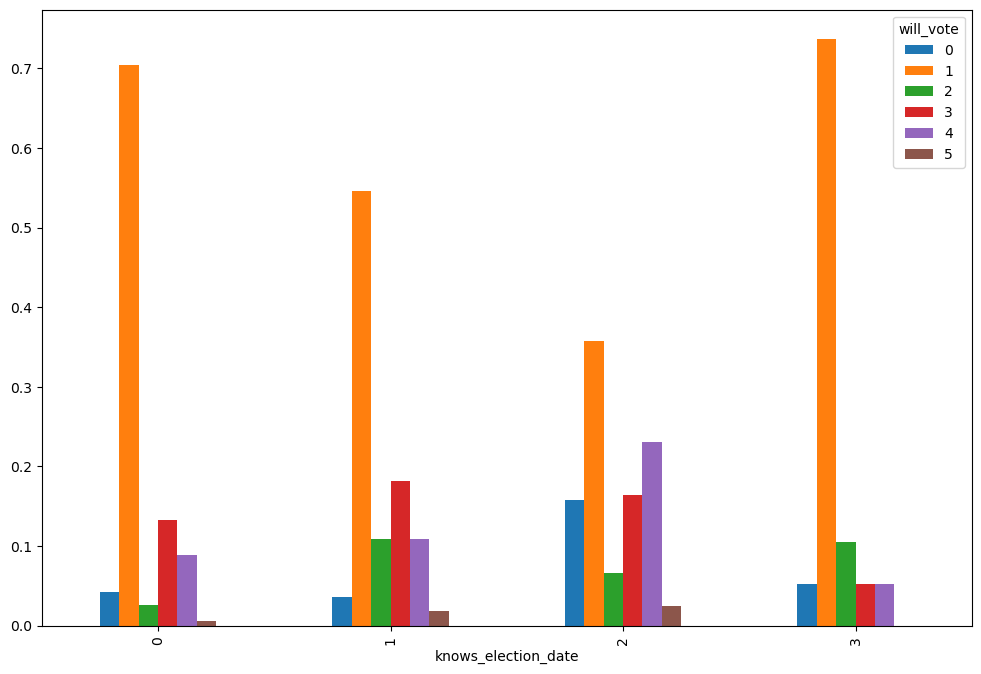

In [72]:
plot('knows_election_date')

In [74]:
df_copy.corr()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
sex,1.000000,-0.180901,0.036061,-0.085414,0.039637,0.086671,0.096110,-0.003599,0.007141,0.021964,-0.057501,0.000598,-0.128376
age,-0.180901,1.000000,-0.062116,0.106935,-0.154970,-0.164180,-0.090643,0.122916,-0.316436,-0.010465,0.029281,-0.030566,-0.319715
federal_district,0.036061,-0.062116,1.000000,0.062403,-0.020293,0.008158,0.000872,0.031538,-0.006966,0.028709,-0.000012,0.009386,-0.066514
type_of_city,-0.085414,0.106935,0.062403,1.000000,-0.017154,-0.024920,-0.044407,0.127671,-0.076207,0.201739,0.012110,0.086950,-0.004713
knows_election_date,0.039637,-0.154970,-0.020293,-0.017154,1.000000,0.107949,0.065000,-0.018401,0.082639,0.125242,0.033799,-0.026998,0.002190
will_vote,0.086671,-0.164180,0.008158,-0.024920,0.107949,1.000000,0.000256,0.021679,0.072220,0.089406,0.027585,-0.002005,-0.004302
candidate,0.096110,-0.090643,0.000872,-0.044407,0.065000,0.000256,1.000000,-0.068540,0.044636,0.015552,0.013156,0.012372,0.002280
television_usage,-0.003599,0.122916,0.031538,0.127671,-0.018401,0.021679,-0.068540,1.000000,-0.005490,0.096806,0.010400,0.036676,-0.109019
internet_usage,0.007141,-0.316436,-0.006966,-0.076207,0.082639,0.072220,0.044636,-0.005490,1.000000,-0.010955,0.010980,-0.046040,0.107962
education,0.021964,-0.010465,0.028709,0.201739,0.125242,0.089406,0.015552,0.096806,-0.010955,1.000000,0.042093,0.018269,-0.325470


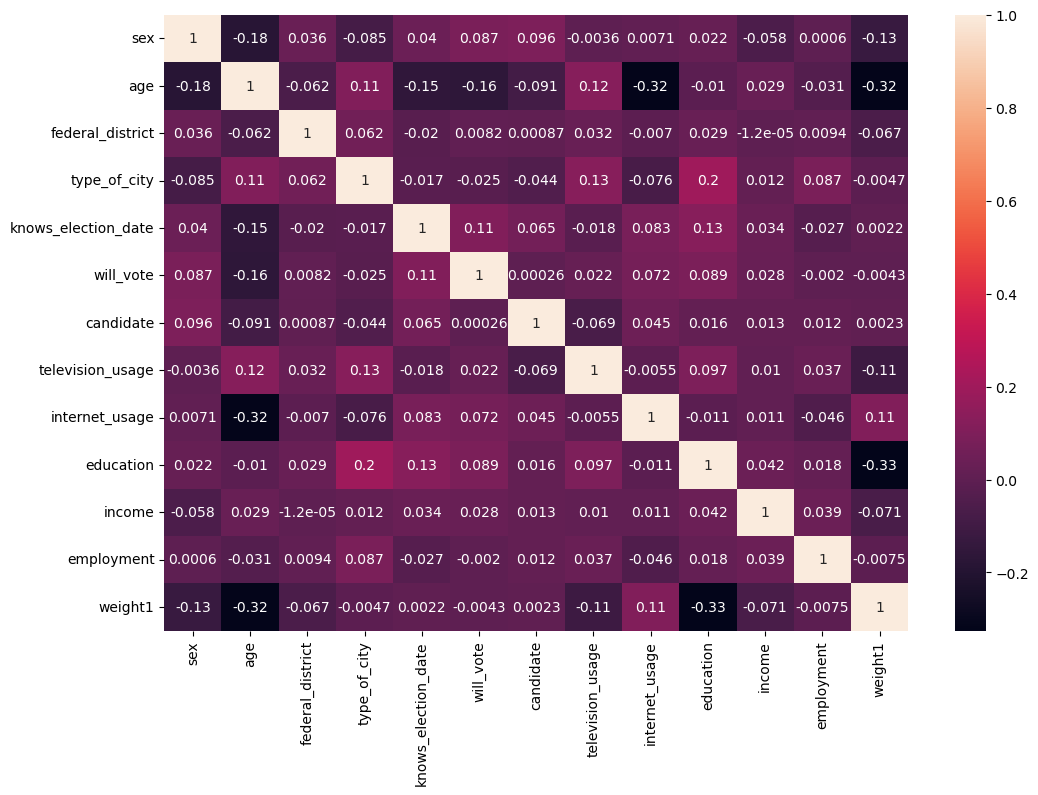

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(data = df_copy.corr(), annot=True)
plt.show()

<Axes: >

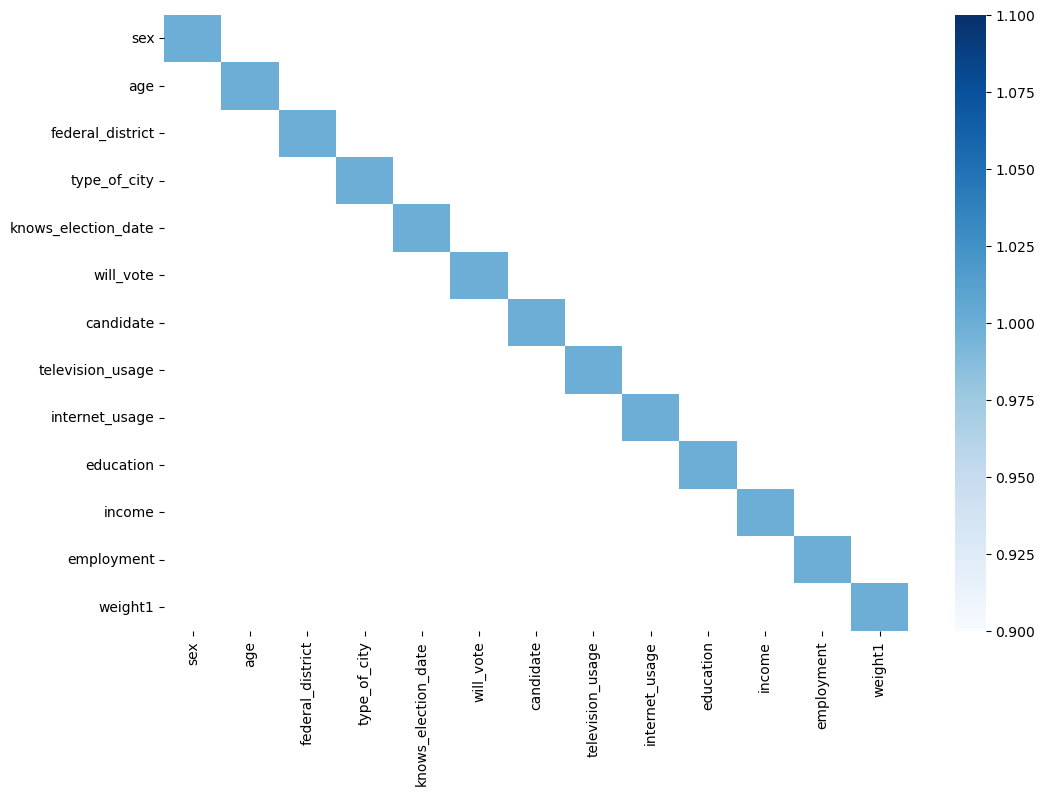

In [91]:
kot = df_copy.corr()[df_copy.corr()>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")
